In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from skimage import exposure

# Gray Level and Equalization

José Luis Lobera del Castillo |
José Miguel de la Mora Álvarez |
Rafael Andrade Ruíz Capetillo 

## Gray Level Histogram

##### Upload the Image

(441, 570)


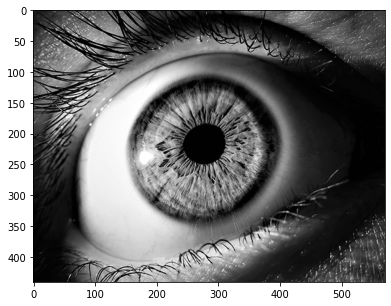

In [209]:
image = cv2.imread('oho.jpeg', 0)
print(image.shape)
#grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))
plt.imshow(image, cmap='gray')

##### Count pixel color ocurrencies

In [210]:
ravel = image.ravel()

print('Number of pixels: ', len(ravel))
print('Ravel: ', ravel)
print('Type: ', type(ravel))

#np.count_nonzero(image.ravel() == i)
ocurrencies = np.array([np.count_nonzero(image.ravel() == i) for i in range(0,256)])
#print('Ocurrencies of pixel value: ', ocurrencies)

Number of pixels:  251370
Ravel:  [28 27 24 ... 28 34 51]
Type:  <class 'numpy.ndarray'>


##### Ploting the ocurrencies

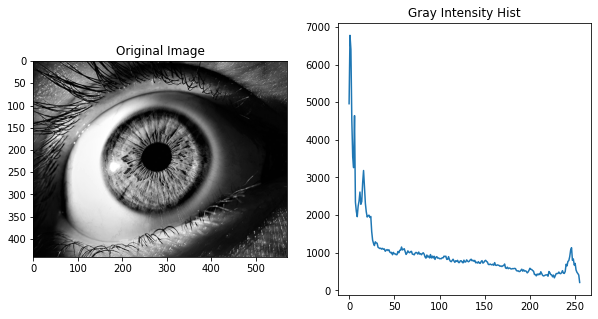

In [211]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)
plt.title('Gray Intensity Hist')
plt.plot(ocurrencies)

plt.show()

##### Easier way to plot the ocurrencies

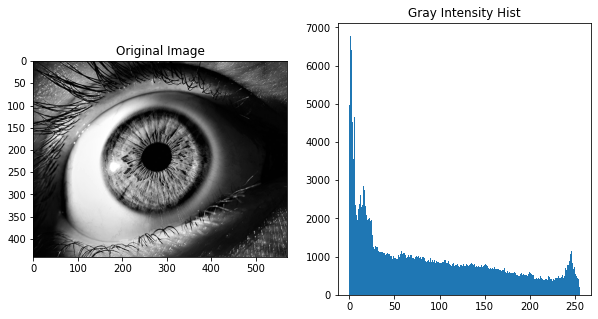

In [212]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)
plt.title('Gray Intensity Hist')
plt.hist(image.ravel(),256,[0,255])

plt.show()

## Image Equalization 

##### Image Equalization From Scratch

In [213]:
values_sum = np.cumsum(ocurrencies)
normalized_values = (values_sum - values_sum.min()) * 255

n = values_sum.max() - values_sum.min()
uniform_norm = normalized_values // n

equalized_img = uniform_norm[ravel]
equalized_img = np.reshape(a=equalized_img, newshape=image.shape)

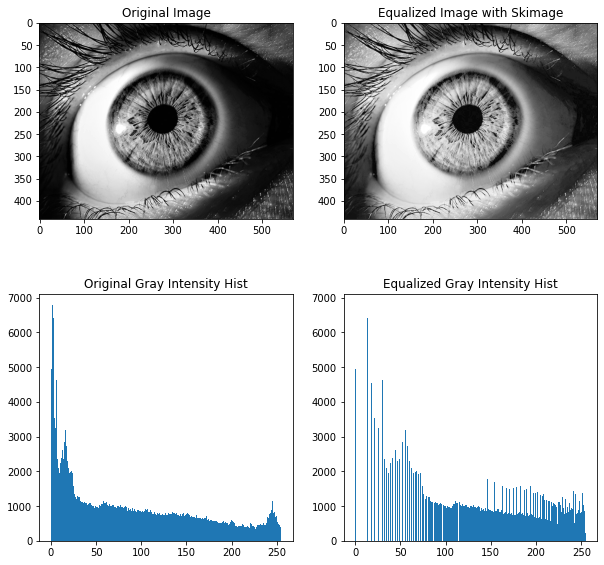

In [214]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image,cmap='gray')

plt.subplot(2,2,2)
plt.title('Equalized Image with Skimage')
plt.imshow(equalized_img, cmap='gray')

plt.subplot(2,2,3)
plt.title('Original Gray Intensity Hist')
plt.hist(image.ravel(),256,[0,255])

plt.subplot(2,2,4)
plt.title('Equalized Gray Intensity Hist')
plt.hist(equalized_img.ravel(),256,[0,255])

plt.show()

##### Image Equalization with Skimage

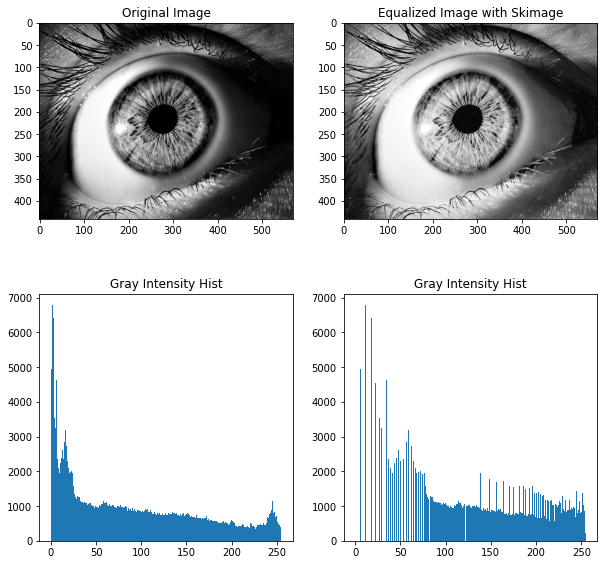

In [215]:
equalized_img = exposure.equalize_hist(image, nbins=256)
equalized_img = (equalized_img * 255).astype(int)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image,cmap='gray')

plt.subplot(2,2,2)
plt.title('Equalized Image with Skimage')
plt.imshow(equalized_img, cmap='gray')

plt.subplot(2,2,3)
plt.title('Gray Intensity Hist')
plt.hist(image.ravel(),256,[0,255])

plt.subplot(2,2,4)
plt.title('Gray Intensity Hist')
plt.hist(equalized_img.ravel(),256,[0,255])

plt.show()